In [1]:
# Core
import datetime
import os
import glob
import tempfile
import shutil
import sys
import pickle
import warnings
import copy

# Analysis 
import xarray as xr
import numpy as np
import pandas as pd
import scipy as sp

# Plotting
import matplotlib.pyplot as plt

# Debugging 
import pdb, traceback
%load_ext line_profiler

# Radar Tools
import pyart
import tint
from tint import animate

# CPOL convenience functions
import CPOL_func as cf


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/563/esh563/pyart/pyart/graph/cm.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:
/home/563/esh563/pyart/pyart/graph/cm_colorblind.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:


In [2]:
filenames = cf.load_wet_seasons(years=list(range(1999,2006)))

Gathering files.
Gathering files.
Gathering files.
Gathering files.
Gathering files.
Gathering files.
Gathering files.


In [7]:
out_file_name = ('/g/data/w40/esh563/CPOL_analysis/'
                 + 'CPOL_filenames.pkl')

with open(out_file_name, 'wb') as f:
    pickle.dump(filenames, f)

In [2]:
with open('/g/data/w40/esh563/CPOL_analysis/TINT_tracks/tracks_obj_7year.pkl', 'rb') as f:
    tracks_obj = pickle.load(f)

In [ ]:
# def test():
# filenames = cf.CPOL_files_from_datetime_list(
#     np.arange(np.datetime64('2006-02-10 10:00'), 
#               np.datetime64('2006-02-10 15:00'), 
#               np.timedelta64(10, 'm'))
# )[0]

# Generate grid generator 
# Note generators produce iterators
# These are alternative to using lists and looping
grids = (pyart.io.read_grid(fn, include_fields = 'reflectivity')
         for fn in filenames)

with open('/g/data/w40/esh563/CPOL_analysis/TINT_tracks/circ_b_ind_set.pkl', 
          'rb') as f:
    b_ind_set = pickle.load(f)

# Define settings for tracking
settings = {
    'MIN_SIZE' : [40, 400, 800], # square km
    'FIELD_THRESH' : ['convective', 20, 15], # DbZ
    'ISO_THRESH' : [10, 10, 10], # DbZ
    'GS_ALT' : 3000,
    'SEARCH_MARGIN' : 10000, # m. This is just for object matching step:
    # does not affect flow vectors.
    'FLOW_MARGIN' : 40000, # m. Margin around object over which to
    # perform phase correlation.
    'LEVELS' : np.array( # m
        [[3000, 3500], 
         [3500, 7500],
         [7500, 10000]]
    ),
    'TRACK_INTERVAL' : 0,
    'BOUNDARY_GRID_CELLS' : b_ind_set,
    'UPDRAFT_START': 3000
}

tracks_obj  = tint.Cell_tracks()

for parameter in ['MIN_SIZE', 'FIELD_THRESH', 'GS_ALT', 'LEVELS', 
                  'TRACK_INTERVAL', 'ISO_THRESH', 'SEARCH_MARGIN',
                  'FLOW_MARGIN', 'BOUNDARY_GRID_CELLS', 'UPDRAFT_START'
                 ]:
    tracks_obj.params[parameter] = settings[parameter]

# Calculate tracks
# %lprun -T lprof0 -f get_filtered_frame_steiner tracks_obj.get_tracks(grids)
tracks_obj.get_tracks(grids)

# Create directory for figures
dt=str(datetime.datetime.now())[0:-7]
dt=dt.replace(" ", "_")
dt=dt.replace(":", "_")
dt=dt.replace("-", "")

out_file_name = ('/g/data/w40/esh563/CPOL_analysis/TINT_tracks/'
                 + 'tracks_obj_test.pkl'.format(dt))

with open(out_file_name, 'wb') as f:
    pickle.dump(tracks_obj, f)
        
#     return tracks_obj
        
# if __name__ == '__main__':
#     try:
#         tracks_obj = test()
#     except:
#         extype, value, tb = sys.exc_info()
#         traceback.print_exc()
#         pdb.post_mortem(tb)
        
# print(open('lprof0', 'r').read())

No objects found in scan 125.    
Time discontinuity at 1999-11-05 04:10:01.
No objects found in scan 394.    
Time discontinuity at 1999-11-08 02:40:00.
No objects found in scan 396.    
Time discontinuity at 1999-11-08 03:30:01.


In [5]:
tracks_obj.tracks['lat'][0].values[0]

-13.37715

In [5]:
with open('/g/data/w40/esh563/CPOL_analysis/TINT_tracks/tracks_obj_test.pkl', 'rb') as f:
    tracks_obj = pickle.load(f)

In [3]:
def test():
    lon_min = 131.0 - 1.6
    lon_max = 131.0 + 1.6

    lat_max = -12.2 + 1.6
    lat_min = -12.2 - 1.6

    [filenames, start_time, end_time] = cf.CPOL_files_from_datetime_list(
        np.arange(np.datetime64('2006-02-10 10:00'), 
                  np.datetime64('2006-02-10 14:00'), 
                  np.timedelta64(10, 'm'))
    )
    
    tracks_obj_temp = copy.deepcopy(tracks_obj)
#     tracks_obj_temp.tracks = tracks_obj_temp.tracks[sub_cond]
#     tracks_obj_temp.system_tracks = tracks_obj_temp.system_tracks[sub_cond_sys]
    
#     filenames, start_time, end_time = cf.CPOL_files_from_TINT_obj(
#         tracks_obj_temp, '12816'
#     )

    # Generate grid generator 
    # Note generators produce iterators
    # These are alternative to using lists and looping
    grids = (pyart.io.read_grid(fn, include_fields = 'reflectivity')
             for fn in filenames)

    # Create directory for figures
    dt=str(datetime.datetime.now())[0:-7]
    dt=dt.replace(" ", "_")
    dt=dt.replace(":", "_")
    dt=dt.replace("-", "")

    base_path = '/g/data/w40/esh563/CPOL_analysis/figures/TINT/'
    out_path = base_path + dt + '_tint_CPOL_anim'

    animate(tracks_obj_temp, grids, out_path,
            start_datetime = start_time,
            end_datetime = end_time,
            lat_lines=np.arange(lat_min, lat_max, .2),
            lon_lines=np.arange(lon_min, lon_max, .2),
            tracers=False, keep_frames=False, dpi=100, alt_low=3000,
            alt_high=9500)
    
if __name__ == '__main__':
    try:
        test()
    except:
        extype, value, tb = sys.exc_info()
        traceback.print_exc()
        pdb.post_mortem(tb)

Gathering files.
Animating from 2006-02-10T10:00 to 2006-02-10T13:50.
Plotting scan at 2006-02-10T13:40:08.
Reached 2006-02-10T13:50.
Breaking loop.

Creating GIF - may take a few minutes.


In [6]:
tracks_obj.system_tracks['v_shift'].xs('0', level='uid')

scan  time               
0     2006-02-10 10:00:09    1.039933
1     2006-02-10 10:10:10    0.693289
2     2006-02-10 10:20:09    2.082640
3     2006-02-10 10:30:09    2.500000
4     2006-02-10 10:40:09    2.500000
5     2006-02-10 10:50:09    2.500000
6     2006-02-10 11:00:09    1.666667
7     2006-02-10 11:10:09    0.833333
8     2006-02-10 11:20:08    0.000000
9     2006-02-10 11:30:08    0.838926
10    2006-02-10 11:40:08    1.670873
11    2006-02-10 11:50:13    1.670873
12    2006-02-10 12:00:09    1.670873
13    2006-02-10 12:10:10    0.837540
14    2006-02-10 12:20:08    0.825060
15    2006-02-10 12:30:08   -0.006887
16    2006-02-10 12:40:08    0.825060
17    2006-02-10 12:50:13    1.661180
18    2006-02-10 13:00:09    2.494513
19    2006-02-10 13:10:10    1.668067
20    2006-02-10 13:20:08    1.668067
21    2006-02-10 13:30:08    0.836120
22    2006-02-10 13:40:08    0.000000
23    2006-02-10 13:50:09    0.834725
24    2006-02-10 14:00:09    1.668058
25    2006-02-10 14:10:1

In [5]:
tracks_obj.record.shifts.xs('0', level='uid')

,corrected,global,last_heads,phase,case
scan,,,,,
0,"[0.5, -1.5]","[1, -2]","[--, --]","[0, -1]",1
1,"[0, -2]","[1, -3]","[0.74, -1.82]","[0, -2]",4
2,"[0, -2]","[0, -2]","[1.52, -2.44]","[0, -2]",4
3,"[1, -2]","[-1, -1]","[1.92, -7.22]","[1, -2]",4
4,"[1, -2]","[0, -1]","[-0.54, 3.07]","[1, -2]",4
5,"[1, -2]","[1, -2]","[0.7, -2.14]","[1, -2]",4
6,"[0, -2]","[1, -3]","[2.59, -1.25]","[0, -2]",4
7,"[0, -2]","[1, -2]","[1.05, -1.59]","[0, -2]",4
8,"[0, -3]","[0, -1]","[0.17, -1.89]","[0, -3]",4


In [5]:
def test():
    uid = '8190'

#     filenames, start_time, end_time = cf.CPOL_files_from_TINT_obj(
#         tracks_obj, uid
#     )
    
    [filenames, start_time, end_time] = cf.CPOL_files_from_datetime_list(
        np.arange(np.datetime64('2006-01-06 06:20'), 
        np.datetime64('2006-01-06 07:10'), 
        np.timedelta64(10, 'm')))

    grids = (pyart.io.read_grid(fn) for fn in filenames)  # refresh grid generator

    # Create directory for figures
    dt=str(datetime.datetime.now())[0:-7]
    dt=dt.replace(" ", "_")
    dt=dt.replace(":", "_")
    dt=dt.replace("-", "")
    
    base_path = '/g/data/w40/esh563/CPOL_analysis/figures/TINT/'
    out_path = base_path + dt + '_tint_CPOL_lagrangian'
    animate(tracks_obj, grids, out_path, style='updraft', uid=uid, 
            alt_low=3000, alt_high=10000, keep_frames=False, dpi=100)
    
if __name__ == '__main__':
    try:
        test()
    except:
        extype, value, tb = sys.exc_info()
        traceback.print_exc()
        pdb.post_mortem(tb)

Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/pandas/core/indexes/base.py", line 2657, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 132, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1601, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1608, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: '8190'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<ipython-input-5-ba492be58933>", line 28, in <module>
    test()
  File "<ipython-input-5-ba492be58933>", line 24, in test
    alt_low=3000, alt_high=10000, keep_frames=False, dpi=100)
  File "/home/563/esh563/TINT/tint/visualization.py", line 813, in ani

Gathering files.
> /home/563/esh563/CPOL_analysis/pandas/_libs/hashtable_class_helper.pxi(1608)pandas._libs.hashtable.PyObjectHashTable.get_item()
(Pdb) q


In [107]:
# Let's filter by tilt direction and magnitude, velocity magnitude
# and significant area.
forward_tilt = ((-45 <= tracks_obj.system_tracks['sys_rel_tilt_dir'])
                & (tracks_obj.system_tracks['sys_rel_tilt_dir'] <= 45))
backward_tilt = ((-135 >= tracks_obj.system_tracks['sys_rel_tilt_dir'])
                | (tracks_obj.system_tracks['sys_rel_tilt_dir'] >= 135))
left_tilt = ((45 <= tracks_obj.system_tracks['sys_rel_tilt_dir'])
                & (tracks_obj.system_tracks['sys_rel_tilt_dir'] <= 135))
right_tilt = ((-135 <= tracks_obj.system_tracks['sys_rel_tilt_dir'])
                & (tracks_obj.system_tracks['sys_rel_tilt_dir'] <= -45))
sig_tilt_mag = (tracks_obj.system_tracks['tilt_mag'] >= 20000)
vel_mag = np.sqrt(tracks_obj.system_tracks['u']**2 
                  + tracks_obj.system_tracks['v']**2)
sig_vel_mag = ((vel_mag >= 5) & (vel_mag <= 40))
eccentricity_mag = tracks_obj.system_tracks['eccentricity'] > .90
# Note for CPOL 2.5 km, total scan area is only 66052 km^2. This makes 
# traditional MCS definitions of area > 30000 km^2 difficult to apply, 
# and still coherently calculate tilt. 
sig_area = ((tracks_obj.system_tracks['proj_area'] >= 4000) & 
            (tracks_obj.system_tracks['proj_area'] <= 50000))
not_border = (tracks_obj.system_tracks['touch_border']*6.25 / tracks_obj.system_tracks['proj_area']) < 0.02

tracks_0 = tracks_obj.tracks[['touch_border', 'proj_area']].xs(
    0, level='level'
)
not_border_0 = (tracks_0['touch_border'] * 6.25 / tracks_0['proj_area']) < 0.02

In [108]:
# Let's find the cells that were tracked for the most frames.
sub_cond_sys = sig_tilt_mag & sig_vel_mag & sig_area & not_border & not_border_0 & forward_tilt & eccentricity_mag
sub_cond = sub_cond_sys.append([sub_cond_sys]*2).sort_index(sort_remaining=True)
levels = np.array([0,1,2]*len(sub_cond_sys))

sub_cond = sub_cond.to_frame()
sub_cond.insert(0, 'level', levels)
sub_cond = sub_cond.reset_index()

sub_cond = sub_cond.set_index(['scan', 'time', 'level', 'uid'])
sub_cond = sub_cond.ix[:,0]
# tracks_obj.tracks[sub_cond]
tracks_obj.system_tracks[sub_cond_sys].groupby(level='uid').size().sort_values(ascending=False)[:20]

uid
12816    6
995      6
2549     6
1033     5
8232     5
8117     4
4584     4
666      4
6070     4
11674    4
8067     4
6390     4
9906     4
1314     3
7101     3
14516    3
2464     3
3081     3
7232     3
14175    3
dtype: int64

In [100]:
tracks_obj.system_tracks[sub_cond_sys].xs('14852', level='uid')['tilt_mag']

scan    time               
118419  2006-03-29 13:20:09    29987.939
118429  2006-03-29 15:00:09    54280.415
118430  2006-03-29 15:10:09    47833.996
118431  2006-03-29 15:20:08    47065.622
118432  2006-03-29 15:30:08    40824.605
118433  2006-03-29 15:40:08    39038.770
118434  2006-03-29 15:50:08    34413.267
118435  2006-03-29 16:00:09    34140.100
118437  2006-03-29 16:20:09    21956.178
118438  2006-03-29 16:30:09    24020.710
118439  2006-03-29 16:40:09    13429.971
118440  2006-03-29 16:50:09    11807.946
118441  2006-03-29 17:00:09     5611.088
Name: tilt_mag, dtype: float64

# Calculate Some Statistics

In [7]:
subset_logic = sig_area & not_border & sig_vel_mag & sig_tilt_mag & not_border_0

sub_tracks = tracks_obj.system_tracks[subset_logic]
sub_uids = list(sorted(set([int(sub_tracks.index.values[i][2]) for i in range(len(sub_tracks))])))
sub_uids = [str(i) for i in sub_uids]

MCS_lengths = [len(sub_tracks.xs(i, level='uid').reset_index(level='time').index.values) for i in sub_uids]

max_MCS = max(MCS_lengths)

# Create 3 lists with lengths the lifetime of longest object.
[TS, LS, PS] = [np.zeros(80) for i in range(3)]

for i in sub_uids:
    obj = sub_tracks.xs(i, level='uid').reset_index(level='time')
    scans = obj.index.values
    scan_label = scans - min(scans)
    tilts = obj['sys_rel_tilt_dir']

    forward_tilt = ((-45 <= tilts) & (tilts <= 45))
    backward_tilt = ((-135 >= tilts) | (tilts >= 135))

    fwd_inds = scan_label[np.argwhere(forward_tilt).flatten().tolist()].tolist()
    bwd_inds = scan_label[np.argwhere(backward_tilt).flatten().tolist()].tolist()
    pll_inds = scan_label[np.argwhere(~backward_tilt & ~forward_tilt).flatten().tolist()].tolist()

    TS[bwd_inds] += 1
    LS[fwd_inds] += 1
    PS[pll_inds] += 1

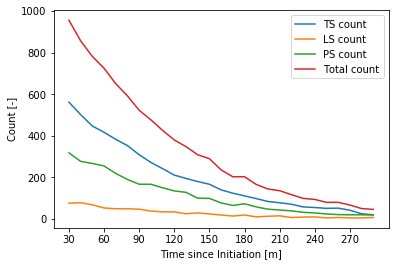

In [8]:
plt.plot(np.arange(30,300,10), TS[3:30], label='TS count')
plt.plot(np.arange(30,300,10), LS[3:30], label='LS count')
plt.plot(np.arange(30,300,10), PS[3:30], label='PS count')
plt.plot(np.arange(30,300,10), (TS+PS+LS)[3:30], label='Total count')
plt.xticks(np.arange(30,300,30))
plt.ylabel('Count [-]')
plt.xlabel('Time since Initiation [m]')
plt.legend()
plt.savefig('/g/data/w40/esh563/CPOL_analysis/figures/TINT/counts.png')

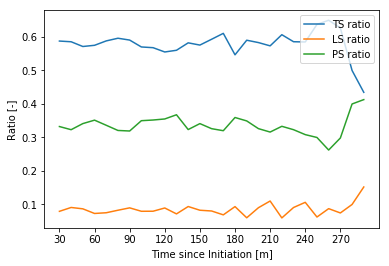

In [9]:
tot = (TS+PS+LS)

plt.plot(np.arange(30,300,10), (TS/tot)[3:30], label='TS ratio')
plt.plot(np.arange(30,300,10), (LS/tot)[3:30], label='LS ratio')
plt.plot(np.arange(30,300,10), (PS/tot)[3:30], label='PS ratio')
plt.xticks(np.arange(30,300,30))
plt.ylabel('Ratio [-]')
plt.xlabel('Time since Initiation [m]')
plt.legend()
# Note that we don't really know the start times of the systems!
plt.savefig('/g/data/w40/esh563/CPOL_analysis/figures/TINT/ratios.png')